In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customer_df = pd.read_csv("dataset/customer.csv")
order_df = pd.read_csv("dataset/order.csv")
product_df = pd.read_csv("dataset/product.csv")
sales_df = pd.read_csv("dataset/sales.csv")

In [10]:
customer_df.describe(include="all")

,Unnamed: 0,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
count,1001.000000,1001.000000,1001,1001,1001.000000,1001,1001.000000,1001,1001,1001
unique,NaN,NaN,1000,3,NaN,1000,NaN,961,8,1
top,NaN,NaN,fulan 943,Prefer not to say,NaN,3117 Heller PlaceSuite 149,NaN,New Ava,South Australia,Australia
freq,NaN,NaN,2,743,NaN,2,NaN,3,140,1001
mean,501.895105,500.942058,NaN,NaN,49.874126,NaN,5000.693307,NaN,NaN,NaN
std,290.944352,289.013599,NaN,NaN,17.644663,NaN,2886.084454,NaN,NaN,NaN
min,0.000000,1.000000,NaN,NaN,20.000000,NaN,2.000000,NaN,NaN,NaN
25%,250.000000,251.000000,NaN,NaN,34.000000,NaN,2398.000000,NaN,NaN,NaN
50%,501.000000,501.000000,NaN,NaN,50.000000,NaN,5079.000000,NaN,NaN,NaN
75%,753.000000,751.000000,NaN,NaN,65.000000,NaN,7454.000000,NaN,NaN,NaN


In [11]:
# melihat demografi pelanggan berdasarkan gender (PIVOT table)
customer_df.groupby(by="gender").agg({
    "customer_id": "nunique",
    "age": ["min", "max", "mean", "std"]
})

customer_id age                          
                      nunique min max       mean        std
gender                                                     
Female                    115  20  79  49.147826  16.646607
Male                      143  20  80  51.230769  18.462635
Prefer not to say         742  20  80  49.725437  17.644283

In [12]:
# melihat persebaran customer berdasarkan kota dan negara bagian
customer_df.groupby(by="city").customer_id.nunique().sort_values(ascending=False)

city
East Aidan       3
East Sophia      3
New Ava          3
West Jackfort    2
Corkeryshire     2
                ..
Jordanside       1
Josephland       1
Josephmouth      1
Justinport       1
Zacville         1
Name: customer_id, Length: 961, dtype: int64

In [13]:
customer_df.groupby(by="state").customer_id.nunique().sort_values(ascending=False)

state
South Australia                 139
Queensland                      134
New South Wales                 132
Northern Territory              125
Western Australia               124
Australian Capital Territory    121
Victoria                        121
Tasmania                        104
Name: customer_id, dtype: int64

In [14]:
# explore order_df with get delivery_time
order_df["delivery_date"] = pd.to_datetime(order_df["delivery_date"])
order_df["order_date"] = pd.to_datetime(order_df["order_date"])

delivery_time = order_df["delivery_date"] - order_df["order_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
order_df["delivery_time"] = round(delivery_time / 86400)

In [15]:
order_df

,Unnamed: 0,order_id,customer_id,payment,order_date,delivery_date,delivery_time
0,0,1,64,30811,2021-08-30,2021-09-24,25.0
1,1,2,473,50490,2021-02-03,2021-02-13,10.0
2,2,3,774,46763,2021-10-08,2021-11-03,26.0
3,3,4,433,39782,2021-05-06,2021-05-19,13.0
4,4,5,441,14719,2021-03-23,2021-03-24,1.0
...,...,...,...,...,...,...,...
995,995,996,345,37843,2021-01-13,2021-02-02,20.0
996,996,997,346,53831,2021-01-18,2021-01-31,13.0
997,997,998,407,53308,2021-05-05,2021-05-21,16.0
998,998,999,428,31643,2021-06-15,2021-07-12,27.0


In [16]:
order_df.describe(include="all")

,Unnamed: 0,order_id,customer_id,payment,order_date,delivery_date,delivery_time
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000
mean,499.500000,500.500000,506.640000,33972.936000,2021-05-27 18:38:52.800000,2021-06-10 20:31:12,14.078000
min,0.000000,1.000000,1.000000,10043.000000,2021-01-01 00:00:00,2021-01-03 00:00:00,1.000000
25%,249.750000,250.750000,275.250000,21329.250000,2021-03-13 18:00:00,2021-03-28 00:00:00,8.000000
50%,499.500000,500.500000,515.000000,33697.500000,2021-05-27 12:00:00,2021-06-11 12:00:00,14.000000
75%,749.250000,750.250000,737.250000,46249.000000,2021-08-12 06:00:00,2021-08-24 06:00:00,21.000000
max,999.000000,1000.000000,1000.000000,59910.000000,2021-10-24 00:00:00,2021-11-20 00:00:00,27.000000
std,288.819436,288.819436,277.115502,14451.609047,NaN,NaN,7.707225


In [17]:
# membuat tabel customer yang pernah order dan belum
customer_id_in_order_df = order_df.customer_id.tolist()
customer_df["status"] = customer_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_order_df else "Non Active")
customer_df.sample(10)

,Unnamed: 0,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status
638,640,639,fulan 639,Prefer not to say,40,23 Zara KnollApt. 502,6722,Lake Alice,Victoria,Australia,Active
777,780,778,fulan 778,Prefer not to say,20,33 Hamish ParkwayApt. 423,2902,Blakemouth,Northern Territory,Australia,Active
842,846,843,fulan 843,Prefer not to say,23,201 Anthony TerraceSuite 543,6272,Lake Addisonland,South Australia,Australia,Active
679,681,680,fulan 680,Prefer not to say,78,5530 Ashton GroveSuite 128,7905,Taylorfurt,New South Wales,Australia,Active
24,24,25,fulan 25,Prefer not to say,75,02 Gabriella PlazaApt. 474,9311,Olivershire,Victoria,Australia,Active
280,280,281,fulan 281,Prefer not to say,24,95 Oliver SquareApt. 137,7637,Evafort,Queensland,Australia,Non Active
195,195,196,fulan 196,Prefer not to say,25,694 Isabella WaySuite 054,4911,New Ava,South Australia,Australia,Active
363,364,364,fulan 364,Prefer not to say,28,3463 Joshua SummitApt. 971,2506,Swiftfort,New South Wales,Australia,Active
352,353,353,fulan 353,Male,22,1800 George RoadSuite 097,9711,Stantonton,Queensland,Australia,Non Active
907,913,908,fulan 908,Prefer not to say,42,69 Sophie PlazaSuite 598,3603,South Alexandraview,Queensland,Australia,Active


In [18]:
# make pivot table to count active and non active customer
customer_df.groupby("status").customer_id.count()

status
Active        617
Non Active    384
Name: customer_id, dtype: int64

In [19]:
# join left order_df and customer_df
order_customer_df = pd.merge(
    left=order_df,
    right=customer_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

In [20]:
order_customer_df.drop(["Unnamed: 0_y", "Unnamed: 0_x"], axis=1)

,order_id,customer_id,payment,order_date,delivery_date,delivery_time,customer_name,gender,age,home_address,zip_code,city,state,country,status
0,1,64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active
1,2,473,50490,2021-02-03,2021-02-13,10.0,fulan 473,Male,61,531 Schmitt BoulevardApt. 010,1744,Annaton,South Australia,Australia,Active
2,3,774,46763,2021-10-08,2021-11-03,26.0,fulan 774,Prefer not to say,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia,Active
3,4,433,39782,2021-05-06,2021-05-19,13.0,fulan 433,Prefer not to say,46,5777 Mayer PassApt. 881,9728,West Michaelport,Tasmania,Australia,Active
4,5,441,14719,2021-03-23,2021-03-24,1.0,fulan 441,Prefer not to say,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,345,37843,2021-01-13,2021-02-02,20.0,fulan 345,Prefer not to say,62,9182 Hermann MallApt. 890,799,Audreyfurt,Victoria,Australia,Active
996,997,346,53831,2021-01-18,2021-01-31,13.0,fulan 346,Prefer not to say,40,59 Bergstrom GroveSuite 260,6060,Olsonbury,Northern Territory,Australia,Active
997,998,407,53308,2021-05-05,2021-05-21,16.0,fulan 407,Male,41,5233 Lara AvenueSuite 291,8697,Hartmannshire,Queensland,Australia,Active
998,999,428,31643,2021-06-15,2021-07-12,27.0,fulan 428,Prefer not to say,66,80 Hermiston WaySuite 403,1112,North Liamfort,Australian Capital Territory,Australia,Active


In [21]:
# order total based on city
order_customer_df.groupby("city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,city,order_id
0,Jordanside,6
1,New Ava,6
2,Lake Rose,5
3,O'keefeton,5
4,East Max,5
5,Port Hannahburgh,5
6,Rubyfort,5
7,West Kai,5
8,Andrewborough,4
9,Port Aaronton,4


In [22]:
# orders total based on state
order_customer_df.groupby("state").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,state,order_id
0,South Australia,148
1,Queensland,139
2,Western Australia,130
3,New South Wales,129
4,Australian Capital Territory,118
5,Victoria,118
6,Tasmania,112
7,Northern Territory,106


In [23]:
# order based on gender
order_customer_df.groupby("gender").order_id.nunique().sort_values(ascending=False)

gender
Prefer not to say    725
Female               139
Male                 136
Name: order_id, dtype: int64

In [24]:
# make age_group column
order_customer_df["age_group"] = order_customer_df.age.apply(lambda x: "Youth" if x <= 24 else ("Senior" if x > 64 else "Adult"))

In [25]:
order_customer_df.groupby("age_group").order_id.nunique().sort_values(ascending=False)

age_group
Adult     681
Senior    226
Youth      93
Name: order_id, dtype: int64

In [26]:
product_df.describe(include="all")

,Unnamed: 0,product_id,product_type,product_name,size,colour,price,quantity,description
count,1260.000000,1260.000000,1260,1260,1260,1260,1260.000000,1260.000000,1260
unique,NaN,NaN,3,35,8,7,NaN,NaN,1260
top,NaN,NaN,Shirt,Denim,XS,red,NaN,NaN,"A red coloured, XS sized, Oxford Cloth Shirt"
freq,NaN,NaN,420,70,252,180,NaN,NaN,1
mean,633.709524,629.500000,NaN,NaN,NaN,NaN,105.805556,60.150000,NaN
std,365.875949,363.874979,NaN,NaN,NaN,NaN,9.704423,11.670573,NaN
min,0.000000,0.000000,NaN,NaN,NaN,NaN,90.000000,40.000000,NaN
25%,316.750000,314.750000,NaN,NaN,NaN,NaN,95.750000,50.000000,NaN
50%,635.500000,629.500000,NaN,NaN,NaN,NaN,108.500000,60.000000,NaN
75%,950.250000,944.250000,NaN,NaN,NaN,NaN,114.000000,70.000000,NaN


In [27]:
sales_df.describe(include="all")

,Unnamed: 0,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2499.500000,2499.500000,503.038200,634.053200,103.501600,1.99240,206.360000
std,1443.520003,1443.520003,285.964418,363.255794,9.195004,0.80751,86.357457
min,0.000000,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


In [28]:
# look the most expensive and chip in product_df
product_df.sort_values(by="price", ascending=False)

,Unnamed: 0,product_id,product_type,product_name,size,colour,price,quantity,description
698,704,698,Jacket,Parka,L,violet,119,53,"A violet coloured, L sized, Parka Jacket"
665,671,665,Jacket,Parka,XS,red,119,65,"A red coloured, XS sized, Parka Jacket"
692,698,692,Jacket,Parka,M,indigo,119,66,"A indigo coloured, M sized, Parka Jacket"
693,699,693,Jacket,Parka,L,indigo,119,44,"A indigo coloured, L sized, Parka Jacket"
694,700,694,Jacket,Parka,XL,indigo,119,78,"A indigo coloured, XL sized, Parka Jacket"
...,...,...,...,...,...,...,...,...,...
1219,1225,1219,Trousers,Pleated,XL,indigo,90,45,"A indigo coloured, XL sized, Pleated Trousers"
1220,1226,1220,Trousers,Pleated,XS,violet,90,58,"A violet coloured, XS sized, Pleated Trousers"
1221,1227,1221,Trousers,Pleated,S,violet,90,50,"A violet coloured, S sized, Pleated Trousers"
1222,1228,1222,Trousers,Pleated,M,violet,90,45,"A violet coloured, M sized, Pleated Trousers"


In [29]:
# make pivot table based on product_type
product_df.groupby("product_type").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price": ["min", "max", "mean"]
})

product_id quantity price                 
                nunique      sum   min  max        mean
product_type                                           
Jacket              420    25387    90  119  107.416667
Shirt               420    25263    92  119  108.333333
Trousers            420    25139    90  119  101.666667

In [30]:
# make pivot table based on product_name
product_df.groupby("product_name").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price": ["min", "max", "mean"]
})

product_id quantity price            
                     nunique      sum   min  max   mean
product_name                                           
Bomber                    35     2083    90   90   90.0
Camp Collared             35     2071   112  112  112.0
Cardigan                  35     2032   118  118  118.0
Cargo Pants               35     2146   106  106  106.0
Casual Slim Fit           35     2086   113  113  113.0
Chambray                  35     2020   105  105  105.0
Chinos                    35     2101   100  100  100.0
Coach                     35     2158   115  115  115.0
Cords                     35     2260   113  113  113.0
Cropped                   35     2085    99   99   99.0
Cuban Collar              35     2017    93   93   93.0
Denim                     70     4204    92  115  103.5
Drawstring                35     2042   104  104  104.0
Dress                     35     2125   119  119  119.0
Flannel                   35     2135    96   96   96.0
Henley                    35     2051    92   92   92.0
High-Waisted              35     2198    98   98   98.0
Joggers                   35     2107    94   94   94.0
Leather                   35     2276   113  113  113.0
Linen                     35     2138   116  116  116.0
Mandarin Collar           35     2203   108  108  108.0
Oxford Cloth              35     2071   114  114  114.0
Parka                     35     2201   119  119  119.0
Peacoat                   35     2067   102  102  102.0
Pleated                   35     2030    90   90   90.0
Polo                      35     2196   117  117  117.0
Puffer                    35     1946   110  110  110.0
Pullover                  35     2184   114  114  114.0
Relaxed Leg               35     2002    95   95   95.0
Shearling                 35     2169    95   95   95.0
Slim-Fit                  35     2155   119  119  119.0
Tracksuit Bottoms         35     2038    91   91   91.0
Trench Coat               35     2132   112  112  112.0
Windbreaker               35     2085   109  109  109.0
Wool                      35     1975   111  111  111.0

In [31]:
# merge product_df to sales_df
sales_product_df = pd.merge(
    left=sales_df,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sales_product_df.head()

,Unnamed: 0_x,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,Unnamed: 0_y,product_type,product_name,size,colour,price,quantity_y,description
0,0,0,1,218,106,2,212,219,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt"
1,1,1,1,481,118,1,118,485,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket"
2,2,2,1,2,96,3,288,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,3,1,1002,106,2,212,1008,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers"
4,4,4,1,691,113,3,339,697,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket"


In [32]:
# make pivot table based on product_type
sales_product_df.groupby("product_type").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
})

,sales_id,quantity_x,total_price
product_type,,,
Jacket,1676,3343,357026
Shirt,1641,3259,333600
Trousers,1683,3360,341174


In [33]:
# make pivot table based on product_name
sales_product_df.groupby("product_name").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
}).sort_values(by="quantity_x", ascending=False)

,sales_id,quantity_x,total_price
product_name,,,
Denim,273,527,52399
Joggers,164,334,31062
Pleated,147,308,32340
Casual Slim Fit,154,306,36414
Shearling,150,302,35334
Relaxed Leg,146,301,27090
Trench Coat,146,299,35581
Puffer,140,298,35164
Bomber,150,297,29700


In [37]:
# merge/join 4 table
all_df = pd.merge(
    left=sales_product_df,
    right=order_customer_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# drop useless columns
all_df = all_df.drop(["Unnamed: 0_x_x", "Unnamed: 0_y_x", "Unnamed: 0_x_y", "Unnamed: 0_y_y"], axis=1)
all_df.head(5)
all_df.to_csv("all_df.csv", index=False)

In [35]:
# make pivot table based on state and product_type
all_df.groupby(by=["state", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
state                        product_type                         
Australian Capital Territory Jacket               406        43204
                             Shirt                396        40448
                             Trousers             454        46790
New South Wales              Jacket               451        47998
                             Shirt                431        43980
                             Trousers             392        39766
Northern Territory           Jacket               365        38991
                             Shirt                336        33865
                             Trousers             384        38998
Queensland                   Jacket               499        53511
                             Shirt                417        42506
                             Trousers             453        46045
South Australia              Jacket               461        49090
                             Shirt                509        52685
                             Trousers             455        46041
Tasmania                     Jacket               412        44370
                             Shirt                387        39668
                             Trousers             379        38057
Victoria                     Jacket               359        38203
                             Shirt                390        40206
                             Trousers             414        41948
Western Australia            Jacket               390        41659
                             Shirt                393        40242
                             Trousers             429        43529

In [36]:
# make pivot table based on gender and product_type
all_df.groupby(by=["gender", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
gender            product_type                         
Female            Jacket               481        50963
                  Shirt                445        45146
                  Trousers             481        49295
Male              Jacket               480        50978
                  Shirt                410        41939
                  Trousers             453        46071
Prefer not to say Jacket              2382       255085
                  Shirt               2404       246515
                  Trousers            2426       245808

In [30]:
# make pivot table based on age_group and product_type
all_df.groupby(by=["age_group", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
age_group product_type                         
Adult     Jacket              2292       245055
          Shirt               2225       227781
          Trousers            2272       231271
Senior    Jacket               777        82959
          Shirt                733        74977
          Trousers             766        77471
Youth     Jacket               274        29012
          Shirt                301        30842
          Trousers             322        32432

In [31]:
# DATA EXPLANATORY & DATA VISUALIZATION

In [32]:
# make a new df from all_df to see monthly order
monthly_order_df = all_df.resample(rule="M", on="order_date").agg({
    "order_id": "nunique",
    "total_price": "sum"
})

# monthly_order_df.index = monthly_order_df.index.strftime("%Y-%m")
monthly_order_df.index = monthly_order_df.index.strftime("%B")    #mengubah format date dalam bulan
monthly_order_df = monthly_order_df.reset_index()
monthly_order_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)
monthly_order_df

,order_date,order_count,revenue
0,January,109,119333
1,February,93,95080
2,March,117,131364
3,April,99,97530
4,May,84,85597
5,June,102,101458
6,July,105,116081
7,August,106,104565
8,September,98,96526
9,October,80,84266


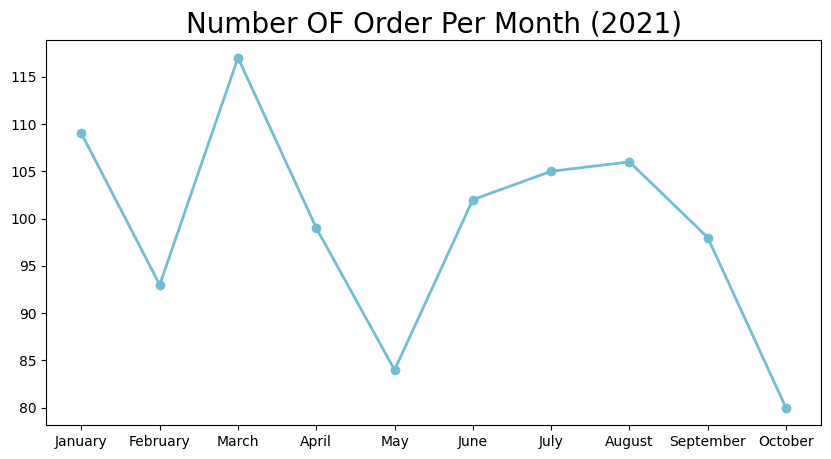

In [33]:
# make a line chart data viz number of order per month based on the monthly_order_df table
plt.figure(figsize=(10, 5))
plt.plot(monthly_order_df["order_date"], monthly_order_df["order_count"], marker="o", linewidth=2, color="#72BCD4")
plt.title("Number OF Order Per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

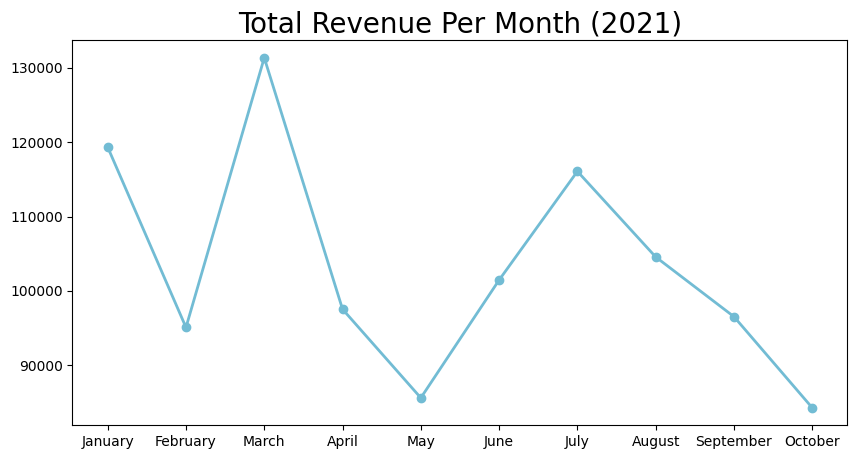

In [34]:
# make a line chart data viz total revenue per month based on monthly_order_df table
plt.figure(figsize=(10, 5))
plt.plot(monthly_order_df["order_date"], monthly_order_df["revenue"],marker="o", linewidth=2, color="#72BCD4")
plt.title("Total Revenue Per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [35]:
# make pivot table to know most sold and least sold product
sum_order_items_df = all_df.groupby("product_name").quantity_x.sum().sort_values(ascending=False).reset_index()
sum_order_items_df


,product_name,quantity_x
0,Denim,527
1,Joggers,334
2,Pleated,308
3,Casual Slim Fit,306
4,Shearling,302
5,Relaxed Leg,301
6,Trench Coat,299
7,Puffer,298
8,Bomber,297
9,Chambray,290


/tmp/ipykernel_17353/981472325.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0], legend=False)
/tmp/ipykernel_17353/981472325.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.sort_values(by="quantity_x", ascending=True).head(5), palette=colors, ax=ax[1], legend=False)


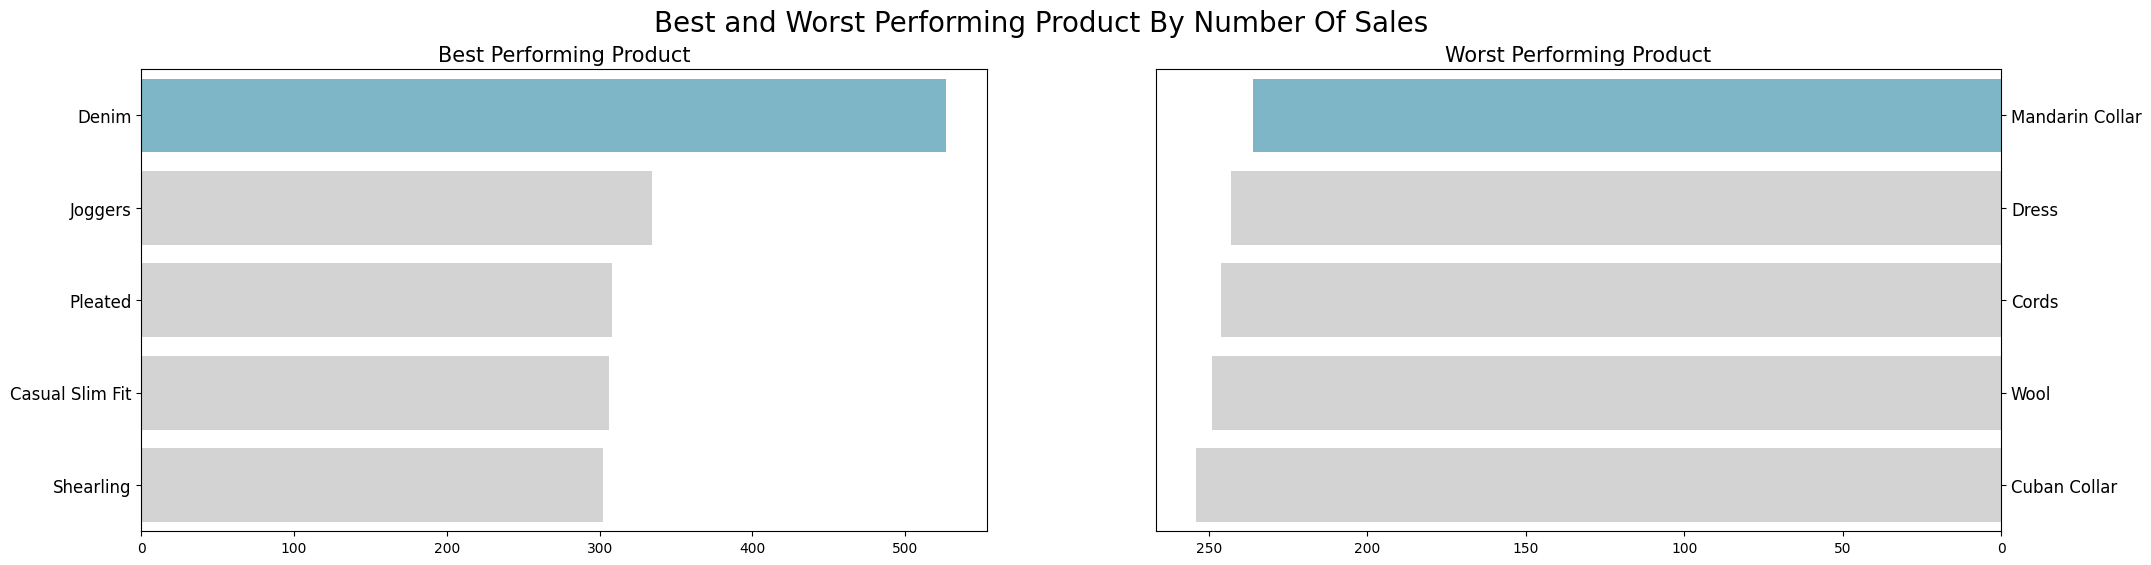

In [36]:
# make 2 canvas viz in one set
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# best performing product
sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0], legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis="y", labelsize=12)

# worst performing product
sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.sort_values(by="quantity_x", ascending=True).head(5), palette=colors, ax=ax[1], legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis="y", labelsize=12)

plt.suptitle("Best and Worst Performing Product By Number Of Sales", fontsize=20)
plt.show()

/tmp/ipykernel_17353/860121935.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="customer_count", x="gender", data=bygender_df.sort_values(by="customer_count", ascending=False), palette=colors)
/tmp/ipykernel_17353/860121935.py:9: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(y="customer_count", x="gender", data=bygender_df.sort_values(by="customer_count", ascending=False), palette=colors)


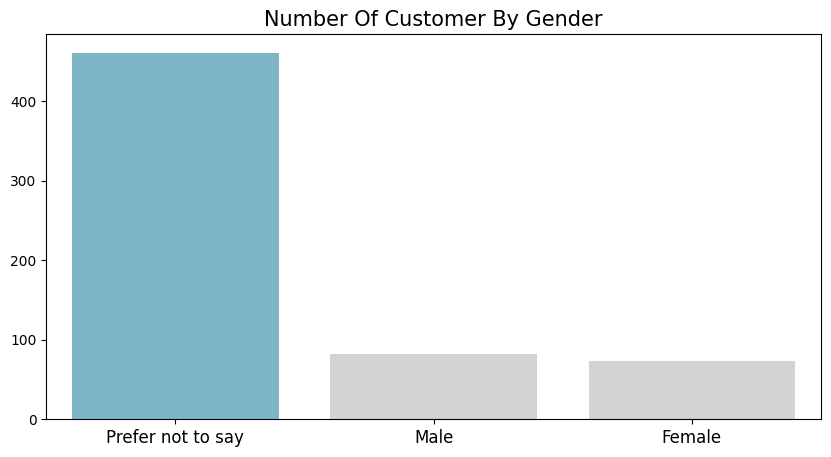

In [37]:
# make demography by gender
bygender_df = all_df.groupby("gender").customer_id.nunique().reset_index()
bygender_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(y="customer_count", x="gender", data=bygender_df.sort_values(by="customer_count", ascending=False), palette=colors)
plt.title("Number Of Customer By Gender", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

/tmp/ipykernel_17353/206294817.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="customer_count", x="age_group", data=byage_df.sort_values(by="age_group", ascending=False), palette=colors_)
/tmp/ipykernel_17353/206294817.py:12: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(y="customer_count", x="age_group", data=byage_df.sort_values(by="age_group", ascending=False), palette=colors_)


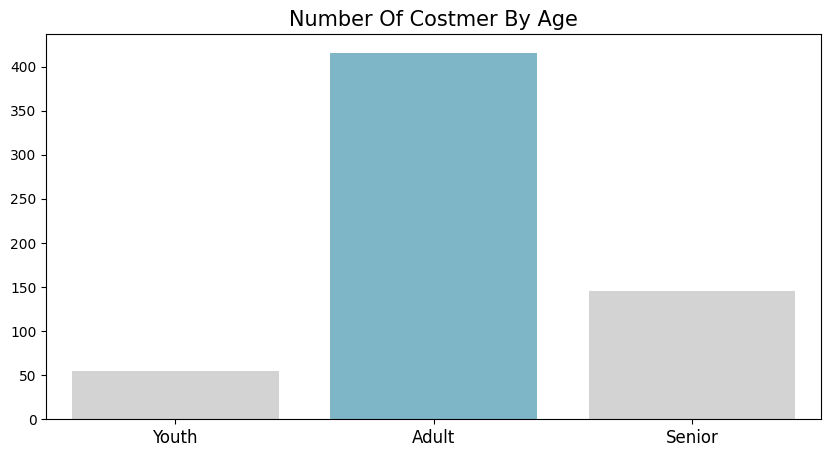

In [64]:
# make demografi by age
byage_df = all_df.groupby(by="age_group").customer_id.nunique().reset_index()
byage_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

byage_df["age_group"] = pd.Categorical(byage_df["age_group"], ["Youth", "Adult", "Senior"])

plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(y="customer_count", x="age_group", data=byage_df.sort_values(by="age_group", ascending=False), palette=colors_)
plt.title("Number Of Costmer By Age", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()


/tmp/ipykernel_17353/1787678874.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="state", x="customer_count", data=bystate_df.sort_values(by="customer_count", ascending=False), palette=colors_)


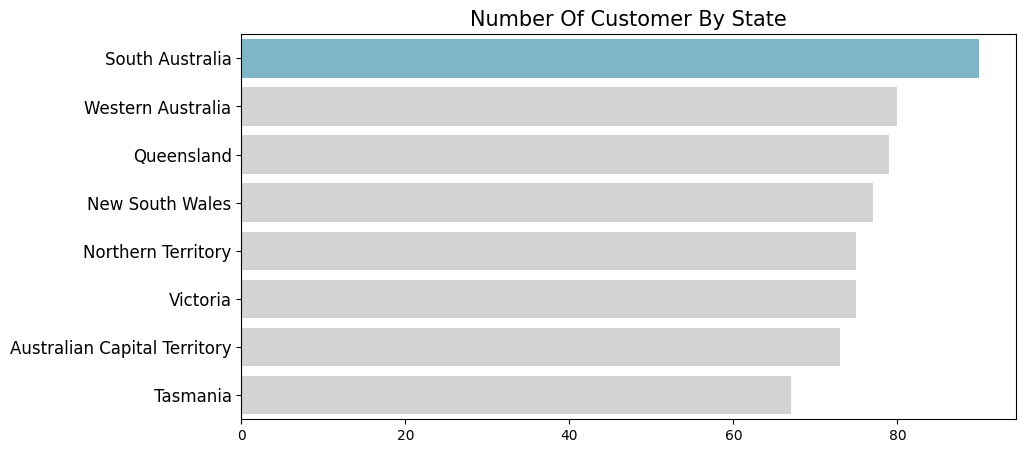

In [66]:
# make customer demografy by state
bystate_df = all_df.groupby("state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(y="state", x="customer_count", data=bystate_df.sort_values(by="customer_count", ascending=False), palette=colors_)
plt.title("Number Of Customer By State", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis="y", labelsize=12)
plt.show()

In [58]:
# rfm analysis
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_date": "max",
    "order_id": "nunique",
    "total_price": "sum"
})

rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# when last customer buy product
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
# recent time based on last customer order
recent_date = order_df["order_date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)


,customer_id,frequency,monetary,recency
0,1,3,1641,203
1,7,1,1017,156
2,10,1,270,229
3,11,1,382,149
4,12,1,1551,127
...,...,...,...,...
611,994,1,1716,285
612,995,1,2140,83
613,996,2,3045,51
614,998,4,4415,97


/tmp/ipykernel_17353/1191166132.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customer_id", y="recency", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
/tmp/ipykernel_17353/1191166132.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customer_id", y="frequency", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
/tmp/ipykernel_17353/1191166132.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customer_id", y="monetary", data=rfm_df.sort_va

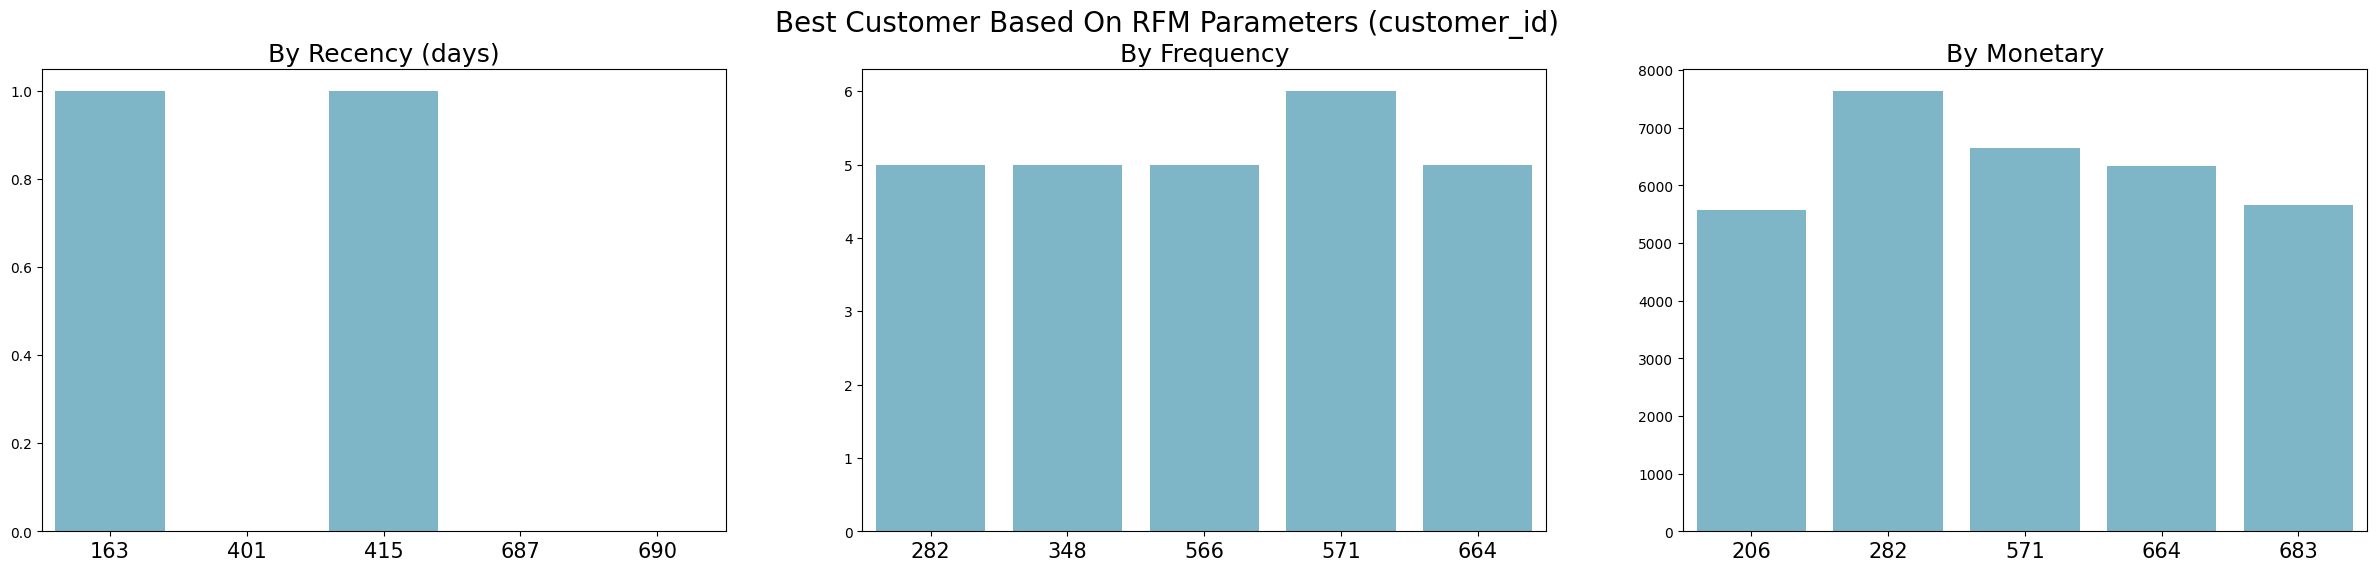

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(x="customer_id", y="recency", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].tick_params(axis="x", labelsize=15)

sns.barplot(x="customer_id", y="frequency", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].tick_params(axis="x", labelsize=15)

sns.barplot(x="customer_id", y="monetary", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].set_xlabel(None)
ax[2].set_ylabel(None)
ax[2].tick_params(axis="x", labelsize=15)

plt.suptitle("Best Customer Based On RFM Parameters (customer_id)", fontsize=20)
plt.show()